In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import datetime
import scipy


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data
input_dir = "D:/2_MS_in_DS/2nd_Semester/Machine_Learning/Project/Data/NYC_Taxi_Data/"
weather_input_dir = "D:/2_MS_in_DS/2nd_Semester/Machine_Learning/Project/Data/Weather_Data/"

nyc_taxi_Jan_2022_cleaned = pd.read_csv(input_dir+"yellow_tripdata_2022-01_cleaned.csv")

weather_data_Jan_2022 =  pd.read_csv(weather_input_dir+"weather_data_Jan_2022_cleaned.csv")
nyc_taxi_lookup = pd.read_csv("D:/2_MS_in_DS/2nd_Semester/Machine_Learning/Project/Data/Lookups/taxi+_zone_lookup.csv")

In [4]:
nyc_taxi_Jan_2022_cleaned.drop(columns=['Unnamed: 0'], inplace =True)
nyc_taxi_Jan_2022_cleaned['tpep_pickup_datetime']= pd.to_datetime(nyc_taxi_Jan_2022_cleaned['tpep_pickup_datetime'])
nyc_taxi_Jan_2022_cleaned['tpep_dropoff_datetime']= pd.to_datetime(nyc_taxi_Jan_2022_cleaned['tpep_dropoff_datetime'])

In [5]:
svm_dataset = nyc_taxi_Jan_2022_cleaned[["PULocationID","DOLocationID","trip_distance","passenger_count","payment_type","trip_times"]]

In [6]:
svm_dataset.dtypes

PULocationID         int64
DOLocationID         int64
trip_distance      float64
passenger_count    float64
payment_type         int64
trip_times         float64
dtype: object

In [7]:
svm_dataset

,PULocationID,DOLocationID,trip_distance,passenger_count,payment_type,trip_times
0,142,236,3.80,2.0,1,17.816667
1,236,42,2.10,1.0,1,8.400000
2,166,166,0.97,1.0,1,8.966667
3,114,68,1.09,1.0,2,10.033333
4,68,163,4.30,1.0,1,37.533333
...,...,...,...,...,...,...
2289531,163,143,1.50,1.0,2,8.316667
2289532,249,68,1.02,1.0,1,4.350000
2289533,68,90,1.53,1.0,1,8.216667
2289534,90,79,1.59,1.0,1,7.750000


In [8]:
svm_dataset['PULocationID'] = svm_dataset['PULocationID'].astype(object)
svm_dataset['DOLocationID'] = svm_dataset['DOLocationID'].astype(object)

In [9]:
svm_dataset.dtypes

PULocationID        object
DOLocationID        object
trip_distance      float64
passenger_count    float64
payment_type         int64
trip_times         float64
dtype: object

#### Converting label from continous to bins:
Analysis:

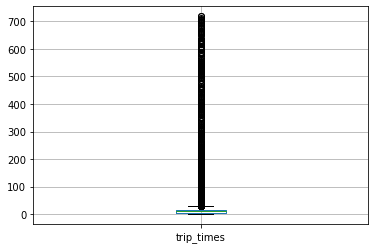

In [10]:
boxplot = svm_dataset.boxplot(column=['trip_times']) 

In [11]:
svm_dataset['trip_times'].quantile([0.25, 0.5, 0.75, 0.9, 0.99])

0.25     6.400000
0.50    10.183333
0.75    16.066667
0.90    24.366667
0.99    47.966667
Name: trip_times, dtype: float64

In [12]:
svm_dataset_1 = svm_dataset

In [13]:
svm_dataset = svm_dataset_1

In [14]:
a = svm_dataset_1

In [15]:
a

,PULocationID,DOLocationID,trip_distance,passenger_count,payment_type,trip_times
0,142,236,3.80,2.0,1,17.816667
1,236,42,2.10,1.0,1,8.400000
2,166,166,0.97,1.0,1,8.966667
3,114,68,1.09,1.0,2,10.033333
4,68,163,4.30,1.0,1,37.533333
...,...,...,...,...,...,...
2289531,163,143,1.50,1.0,2,8.316667
2289532,249,68,1.02,1.0,1,4.350000
2289533,68,90,1.53,1.0,1,8.216667
2289534,90,79,1.59,1.0,1,7.750000


In [16]:
#svm_dataset[svm_dataset['trip_times']  >65][trip_times] = 10.183333

In [17]:
svm_dataset['trip_times'].max()

717.7333333333333

In [18]:


# Define the bin edges and labels
trip_times_bins = [0, 7, 10, 16, 25, 800]
trip_times_labels = ['Very_Short_Trip', 'Short_Trip', 'Meduim_Trip', 'Long_Trip', 'Very_Long_Trip']



# Use the cut() function to bin the data
svm_dataset['trip_times_Labels'] = pd.cut(svm_dataset['trip_times'], bins=trip_times_bins, labels=trip_times_labels)


# Print the resulting dataframe
svm_dataset


,PULocationID,DOLocationID,trip_distance,passenger_count,payment_type,trip_times,trip_times_Labels
0,142,236,3.80,2.0,1,17.816667,Long_Trip
1,236,42,2.10,1.0,1,8.400000,Short_Trip
2,166,166,0.97,1.0,1,8.966667,Short_Trip
3,114,68,1.09,1.0,2,10.033333,Meduim_Trip
4,68,163,4.30,1.0,1,37.533333,Very_Long_Trip
...,...,...,...,...,...,...,...
2289531,163,143,1.50,1.0,2,8.316667,Short_Trip
2289532,249,68,1.02,1.0,1,4.350000,Very_Short_Trip
2289533,68,90,1.53,1.0,1,8.216667,Short_Trip
2289534,90,79,1.59,1.0,1,7.750000,Short_Trip


Checking nulls

In [19]:
svm_dataset.isnull().sum()

PULocationID         0
DOLocationID         0
trip_distance        0
passenger_count      0
payment_type         0
trip_times           0
trip_times_Labels    0
dtype: int64

Remove "trip_times" columns

In [20]:
svm_dataset.drop(columns=['trip_times'], inplace=True)

In [21]:
svm_dataset.columns

Index(['PULocationID', 'DOLocationID', 'trip_distance', 'passenger_count',
       'payment_type', 'trip_times_Labels'],
      dtype='object')

In [22]:
svm_dataset

,PULocationID,DOLocationID,trip_distance,passenger_count,payment_type,trip_times_Labels
0,142,236,3.80,2.0,1,Long_Trip
1,236,42,2.10,1.0,1,Short_Trip
2,166,166,0.97,1.0,1,Short_Trip
3,114,68,1.09,1.0,2,Meduim_Trip
4,68,163,4.30,1.0,1,Very_Long_Trip
...,...,...,...,...,...,...
2289531,163,143,1.50,1.0,2,Short_Trip
2289532,249,68,1.02,1.0,1,Very_Short_Trip
2289533,68,90,1.53,1.0,1,Short_Trip
2289534,90,79,1.59,1.0,1,Short_Trip


Creating a sample of the distribution

In [23]:
svm_dataset_subset = svm_dataset.sample(n=100000, random_state=42)

In [24]:
svm_dataset_subset

,PULocationID,DOLocationID,trip_distance,passenger_count,payment_type,trip_times_Labels
1145144,238,100,2.98,1.0,2,Meduim_Trip
204913,43,163,1.30,1.0,2,Very_Short_Trip
1468161,237,140,0.63,1.0,2,Short_Trip
1331467,137,70,8.77,1.0,2,Long_Trip
1458592,262,163,3.04,1.0,1,Meduim_Trip
...,...,...,...,...,...,...
1545727,79,211,1.10,1.0,1,Very_Short_Trip
713041,68,48,0.40,1.0,1,Very_Short_Trip
590465,125,195,4.80,1.0,1,Long_Trip
1516615,164,163,1.61,1.0,2,Meduim_Trip


In [25]:
label = svm_dataset_subset[['trip_times_Labels']]
svm_data = svm_dataset_subset[['PULocationID', 'DOLocationID', 'trip_distance', 'passenger_count',
       'payment_type']]

Save the dataset

In [26]:

# save the data
#output_dir = "D:/2_MS_in_DS/2nd_Semester/Machine_Learning/Project/Data/NYC_Taxi_Data/"
#svm_data.to_csv(output_dir+"nyc_taxi_Jan_2022_SVM_test_data1.csv")

In [27]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(svm_data,label,
                                   random_state=104, 
                                   test_size=0.3, 
                                   shuffle=True)
  

In [28]:
X_test

,PULocationID,DOLocationID,trip_distance,passenger_count,payment_type
1401099,162,262,2.20,1.0,1
300844,263,264,1.47,1.0,1
2032446,249,231,1.98,1.0,1
579197,236,151,2.00,1.0,1
916466,233,107,1.60,1.0,2
...,...,...,...,...,...
1195487,48,161,1.48,1.0,1
749815,70,234,9.45,3.0,1
315506,230,186,0.80,2.0,1
431096,239,170,2.40,3.0,2


#### SVM 1 - Linear Kernel, with Cost as 10

In [29]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

SVM_Model=LinearSVC(C=10)

SVM_Model.fit(X_train, y_train)
print("SVM prediction:\n", SVM_Model.predict(X_test))
print("Actual:")
print(y_test)

SVM_matrix = confusion_matrix(y_test, SVM_Model.predict(X_test))
print("\nThe confusion matrix for basic linear SVC is:")
print(SVM_matrix)
print("\n\n")

SVM prediction:
 ['Very_Short_Trip' 'Very_Short_Trip' 'Very_Short_Trip' ...
 'Very_Short_Trip' 'Meduim_Trip' 'Very_Short_Trip']
Actual:
        trip_times_Labels
1401099       Meduim_Trip
300844        Meduim_Trip
2032446   Very_Short_Trip
579197         Short_Trip
916466        Meduim_Trip
...                   ...
1195487        Short_Trip
749815     Very_Long_Trip
315506    Very_Short_Trip
431096        Meduim_Trip
1068057   Very_Short_Trip

[30000 rows x 1 columns]

The confusion matrix for basic linear SVC is:
[[   9 3018   34 1004  707]
 [   5 3743   26  224 3813]
 [   0 1298    5    0 4561]
 [   1  726    5 1972   58]
 [   0  529    0    0 8262]]





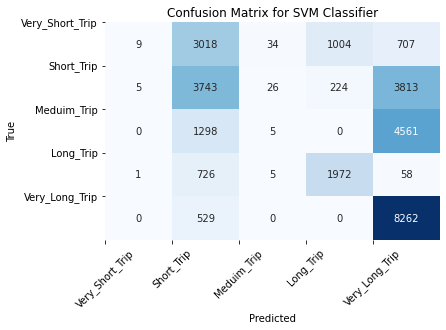

In [30]:
sns.heatmap(SVM_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

#trip_times_labels
plt.xticks(ticks=range(len(trip_times_labels)), labels=trip_times_labels, rotation=45)
plt.yticks(ticks=range(len(trip_times_labels)), labels=trip_times_labels, rotation=0)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM Classifier')

# Show the plot
plt.show()

In [31]:
#SVM_Model=LinearSVC(C=10)
#SVM_Model.fit(X_train, y_train)
y_pred = SVM_Model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 46.64%


With cost= 5

In [37]:
SVM_Model=LinearSVC(C=5)
SVM_Model.fit(X_train, y_train)
y_pred = SVM_Model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 37.89%


In [32]:
label_accuracy = accuracy_score(y_test, y_pred, normalize=False)

# Get the total number of samples per label
label_counts = np.bincount(y_test)

# Calculate accuracy for each label as a percentage
label_accuracy_percentage = label_accuracy / label_counts * 100

# Print accuracy for each label
for i, acc in enumerate(label_accuracy_percentage):
    print("Label {}: Accuracy: {:.2f}%".format(i, acc))

ValueError: invalid literal for int() with base 10: 'Meduim_Trip'

### Polynomial Kernel

In [33]:
from sklearn.svm import SVC

For cost=5

In [34]:
SVM_Model2 = SVC(kernel = 'poly', degree = 3, C=5)
SVM_Model2.fit(X_train, y_train)

SVC(C=5, kernel='poly')

In [35]:
SVM2_matrix = confusion_matrix(y_test, SVM_Model2.predict(X_test))

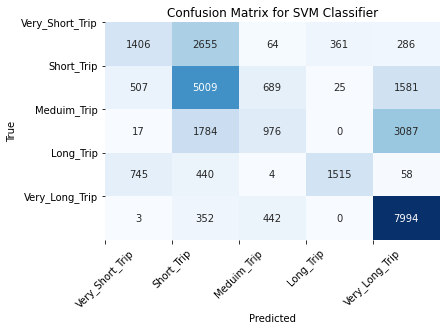

In [36]:
sns.heatmap(SVM2_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

#trip_times_labels
plt.xticks(ticks=range(len(trip_times_labels)), labels=trip_times_labels, rotation=45)
plt.yticks(ticks=range(len(trip_times_labels)), labels=trip_times_labels, rotation=0)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM Classifier')

# Show the plot
plt.show()

In [38]:
#SVM_Model2 = SVC(kernel = 'poly', degree = 3, C=5)
#SVM_Model2.fit(X_train, y_train)
y_pred = SVM_Model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 56.33%


For Cost=15.

In [39]:
SVM_Model2 = SVC(kernel = 'poly', degree = 3, C=15)
SVM_Model2.fit(X_train, y_train)
y_pred = SVM_Model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 57.29%


In [40]:
SVM2_matrix = confusion_matrix(y_test, SVM_Model2.predict(X_test))

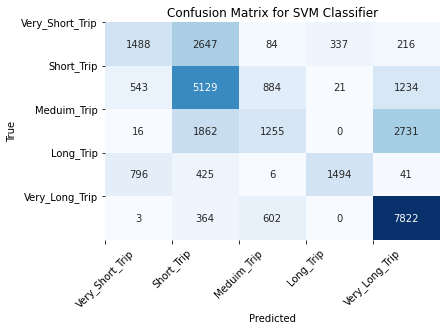

In [41]:
sns.heatmap(SVM2_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

#trip_times_labels
plt.xticks(ticks=range(len(trip_times_labels)), labels=trip_times_labels, rotation=45)
plt.yticks(ticks=range(len(trip_times_labels)), labels=trip_times_labels, rotation=0)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM Classifier')

# Show the plot
plt.show()

### RBF Kernel


In [42]:
SVM_Model3 = SVC(kernel = 'rbf',C=3.5)
SVM_Model3.fit(X_train, y_train)

SVC(C=3.5)

In [43]:
SVM3_matrix = confusion_matrix(y_test, SVM_Model3.predict(X_test))

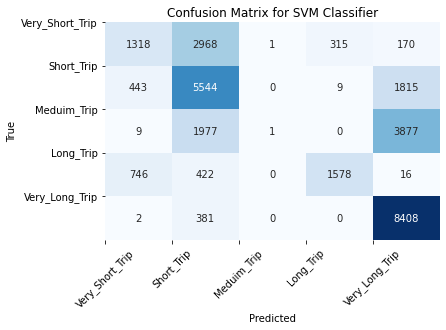

In [44]:
sns.heatmap(SVM3_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

#trip_times_labels
plt.xticks(ticks=range(len(trip_times_labels)), labels=trip_times_labels, rotation=45)
plt.yticks(ticks=range(len(trip_times_labels)), labels=trip_times_labels, rotation=0)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM Classifier')

# Show the plot
plt.show()

In [47]:
#SVM_Model3 = SVC(kernel = 'rbf',C=3.5)
#SVM_Model3.fit(X_train, y_train)
y_pred = SVM_Model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 56.16%


For cost = 10

In [48]:
SVM_Model3 = SVC(kernel = 'rbf',C=15)
SVM_Model3.fit(X_train, y_train)

SVC(C=15)

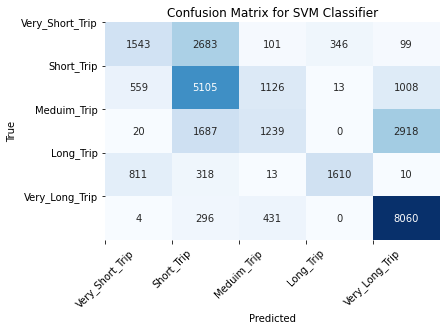

In [49]:
SVM3_matrix = confusion_matrix(y_test, SVM_Model3.predict(X_test))
sns.heatmap(SVM3_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

#trip_times_labels
plt.xticks(ticks=range(len(trip_times_labels)), labels=trip_times_labels, rotation=45)
plt.yticks(ticks=range(len(trip_times_labels)), labels=trip_times_labels, rotation=0)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM Classifier')

# Show the plot
plt.show()

In [50]:
#SVM_Model3 = SVC(kernel = 'rbf',C=10)
#SVM_Model3.fit(X_train, y_train)
y_pred = SVM_Model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 57.29%
